In [1]:
%matplotlib inline
import cv2
import numpy as np

# Auxiliar Functions

In [2]:
def contrast_streching(img):
    
    img = img.astype('uint8')
    high = np.max(img)
    low = np.min(img)

    x = np.linspace(0,255,256);

    declive = 255./(high - low);
    ordenada = - declive * low;
    table = declive * x + ordenada;
    table[0:low] = 0;
    table[high:256] = 255;


    table = np.array([table.astype('uint8')])
    img_enchanted = cv2.LUT(img,table)
    return img_enchanted

In [3]:
def binarize_mean(img):
    
    mean = np.mean(img) - 10
    
    img_binarize = np.empty([img.shape[0], img.shape[1]])
                            
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] >= mean:
                img_binarize[i,j] = 1
            else:
                img_binarize[i,j] = 0
    return img_binarize  

In [4]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for x in xrange(0, image.shape[0], stepSize):
        for y in xrange(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[ y:y + windowSize[0],x:x + windowSize[1]])

In [5]:
def invertChannels(img):
    b,g,r = cv2.split(img) # split channels
    return cv2.merge((r,g,b)) # merge in rgb order to display with matplotlib

In [6]:
# power law tranformation
def power_law_lut(c, g):
    table = np.zeros(256,'uint8')

    table = np.array([( c * (i / 255.0) ** g) * 255 for i in np.arange(0, 256)]).astype("uint8")

    return np.array([table.astype('uint8')])

In [7]:
# mean square error
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    return err

# FingerPrint Enchancement

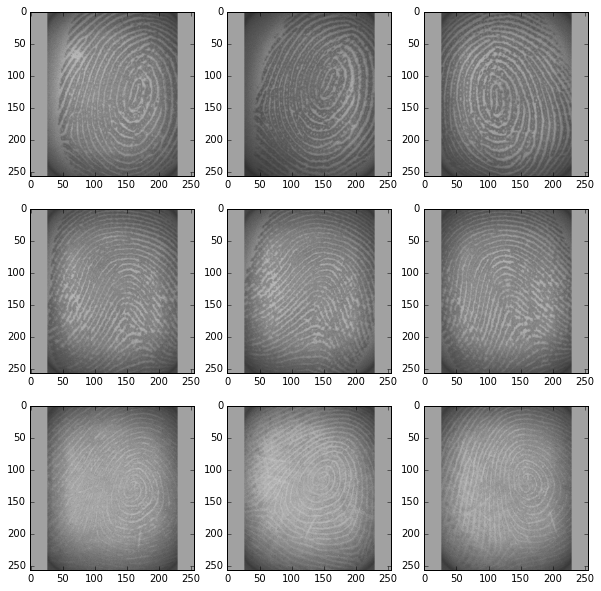

In [8]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img11 = cv2.imread('../../fingerprintDB/#1/11.bmp')
img12 = cv2.imread('../../fingerprintDB/#1/12.bmp')
img13 = cv2.imread('../../fingerprintDB/#1/13.bmp')

img21 = cv2.imread('../../fingerprintDB/#2/21.bmp')
img22 = cv2.imread('../../fingerprintDB/#2/22.bmp')
img23 = cv2.imread('../../fingerprintDB/#2/23.bmp')

img31 = cv2.imread('../../fingerprintDB/#3/31.bmp')
img32 = cv2.imread('../../fingerprintDB/#3/32.bmp')
img33 = cv2.imread('../../fingerprintDB/#3/33.bmp')

plt.figure(figsize=(10,10)) 

plt.subplot(331)
plt.imshow(invertChannels(img11))
plt.subplot(332)
plt.imshow(invertChannels(img12))
plt.subplot(333)
plt.imshow(invertChannels(img13))

plt.subplot(334)
plt.imshow(invertChannels(img21))
plt.subplot(335)
plt.imshow(invertChannels(img22))
plt.subplot(336)
plt.imshow(invertChannels(img23))


plt.subplot(337)
plt.imshow(invertChannels(img31))
plt.subplot(338)
plt.imshow(invertChannels(img32))
plt.subplot(339)
plt.imshow(invertChannels(img33))

## crop around

In [9]:
def crop_around_center(image, width, height):
    """
    Given a NumPy / OpenCV 2 image, crops it to the given width and height,
    around it's centre point
    """

    image_size = (image.shape[1], image.shape[0])
    image_center = (int(image_size[0] * 0.5), int(image_size[1] * 0.5))

    if(width > image_size[0]):
        width = image_size[0]

    if(height > image_size[1]):
        height = image_size[1]

    x1 = int(image_center[0] - width * 0.5)
    x2 = int(image_center[0] + width * 0.5)
    y1 = int(image_center[1] - height * 0.5)
    y2 = int(image_center[1] + height * 0.5)

    return image[y1:y2, x1:x2]

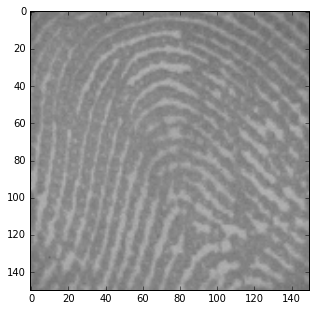

In [10]:
img21_cropped = crop_around_center(img23, 150 , 150)

plt.figure(figsize=(5,5)) 
plt.imshow(invertChannels(img21_cropped),cmap='Greys')

# Convert to grayscale

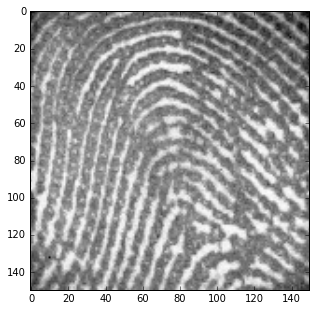

In [11]:
#skip
#convert to grayscale
b,g,r = cv2.split(img21_cropped)
img21_cropped_gray = img21_cropped[:,:,0]
#img21_cropped_gray = cv2.cvtColor(img21_cropped,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(5,5)) 
plt.imshow(img21_cropped_gray,cmap='Greys_r')

# Pre-Processing

## Contrast Streching

(0, 256)

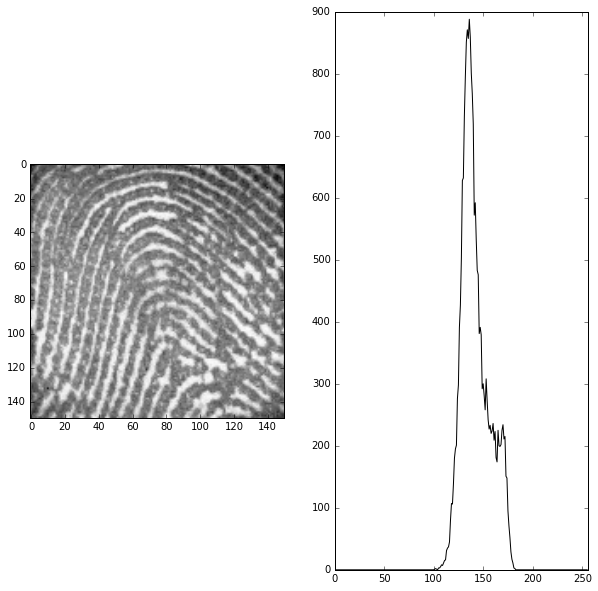

In [12]:
plt.figure(figsize=(10,10)) 

plt.subplot(121)
plt.imshow(img21_cropped_gray,cmap='Greys_r') 

plt.subplot(122)
histr = cv2.calcHist([img21_cropped_gray],[0],None,[256],[0,255])
plt.plot(histr,color = 'k')
plt.xlim([0,256]) 

(0, 256)

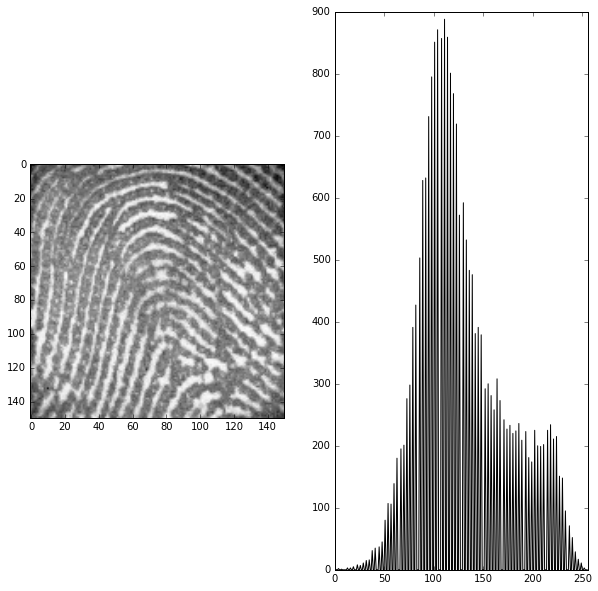

In [13]:
# build look up table
high = np.max(img21_cropped_gray)
low = np.min(img21_cropped_gray)

x = np.linspace(0,255,256);

declive = 255./(high - low);
ordenada = - declive * low;
table = declive * x + ordenada;
table[0:low] = 0;
table[high:256] = 255;
    

table = np.array([table.astype('uint8')])
img_pre1 = cv2.LUT(img21_cropped_gray,table)

plt.figure(figsize=(10,10)) 
plt.subplot(121)
plt.imshow(img_pre1,cmap='Greys_r')


plt.subplot(122)
histr = cv2.calcHist([img_pre1],[0],None,[256],[0,255])
plt.plot(histr,color = 'k')
plt.xlim([0,256]) 

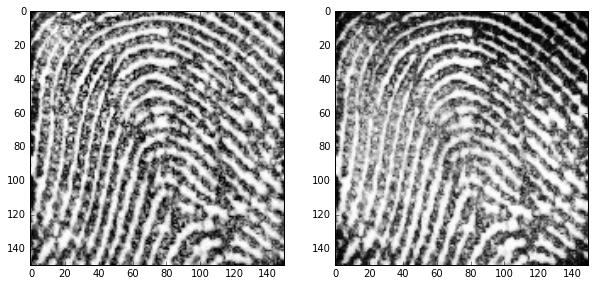

In [14]:
plt.figure(figsize=(10,10))
clahe = cv2.createCLAHE()


plt.subplot(121)
img_pre2 = clahe.apply(img_pre1)
plt.imshow(img_pre2,cmap='Greys_r')

plt.subplot(122)
img_pre2_test = cv2.equalizeHist(img_pre1)
plt.imshow(img_pre2_test,cmap='Greys_r')

In [15]:
# with overlap
def block_process_overlap(a, blocksize, overlap, filt, args):
    b = np.empty(a.shape)
    
    for row in range(0, a.shape[0] - overlap, blocksize - overlap ):
        for col in range(0, a.shape[1] - overlap, blocksize - overlap ):
            b[col:col + blocksize, row:row + blocksize] = (
                filt(a[col:col + blocksize, row:row + blocksize], *args))
    return b

In [16]:
def block_process(a, blocksize, filt, args):
    b = np.empty(a.shape)
    for row in xrange(0, a.shape[0], blocksize):
        for col in xrange(0, a.shape[1], blocksize):                            
            b[col:col + blocksize, row:row + blocksize] = (
                filt(a[col:col + blocksize, row:row + blocksize], *args))
    return b

(0, 256)

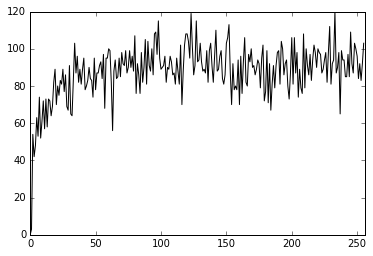

In [17]:
histr = cv2.calcHist([img_pre2],[0],None,[256],[0,255])
plt.plot(histr,color = 'k')
plt.xlim([0,256]) 

# Smoothing

# FFT Enchancement

In [18]:
def filter_fft(block, k):        
    dft = cv2.dft(np.float32(block), flags = cv2.DFT_COMPLEX_OUTPUT)    
    #dft_tmp = dft * abs(dft)**k
    dft_tmp = dft * np.absolute(dft)**k    
    img_back = cv2.idft(dft_tmp)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])    
    return img_back

In [33]:
iench_fft_3 = filter_fft(img_pre2, 0.4)

iench_fft_2 = block_process_overlap(img_pre2, 30,0,filter_fft, (0.35,))
iench_fft_1 = block_process(img_pre2, 25, filter_fft, (0.2222,))

iench_fft_1 *= 255.0/iench_fft_1.max()
iench_fft_1 = iench_fft_1.astype('uint8')

iench_fft_2 *= 255.0/iench_fft_2.max()
iench_fft_2 = iench_fft_2.astype('uint8')

#iench_fft_2[iench_fft_2 > 0] = 255

iench_fft_3 *= 255.0/iench_fft_3.max()
iench_fft_3 = iench_fft_3.astype('uint8')

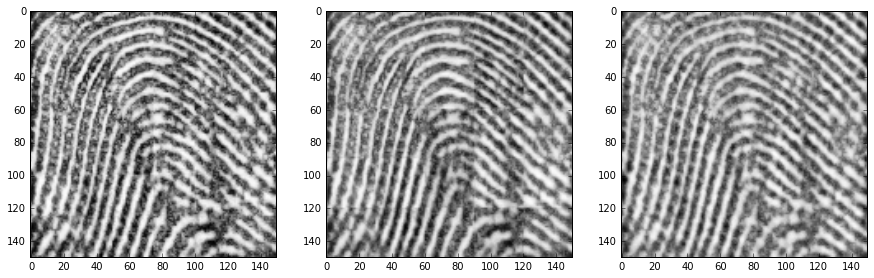

In [34]:
plt.figure(figsize=(15,15)) 
plt.subplot(131)
plt.imshow(iench_fft_1,cmap='Greys_r')
plt.subplot(132)
plt.imshow(iench_fft_2,cmap='Greys_r')
plt.subplot(133)
plt.imshow(iench_fft_3,cmap='Greys_r')

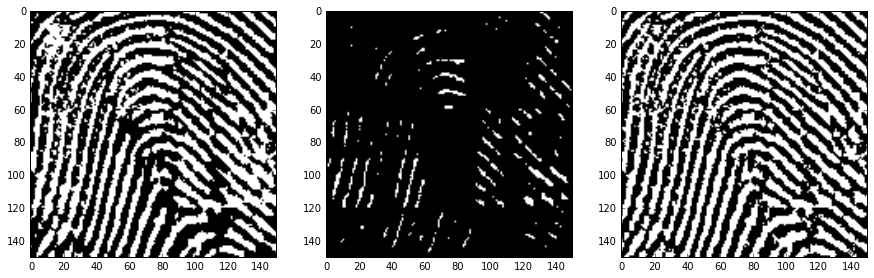

In [36]:
##############
# Corrigir o histograma bloco por block para calcular melhor o threshold

#itest = block_process(iench_fft_1, 25, contrast_streching, ())
#itest = block_process(iench_fft_3, 25, cv2.equalizeHist, ())
itest = cv2.equalizeHist(iench_fft_3)

####    
ret,iench_fft_bin_1 = cv2.threshold(iench_fft_2.astype('uint8'),170,255,cv2.THRESH_BINARY)

iench_fft_bin_2 = []
ret,iench_fft_bin_2 = cv2.threshold(iench_fft_2.astype('uint8'),225,255,cv2.THRESH_BINARY)

iench_fft_bin_3 = cv2.adaptiveThreshold(iench_fft_2.astype('uint8'),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,25,-1)

plt.figure(figsize=(15,15)) 
plt.subplot(131)
plt.imshow(iench_fft_bin_1,cmap='Greys_r')

plt.subplot(132)
plt.imshow(iench_fft_bin_2,cmap='Greys_r')

plt.subplot(133)
plt.imshow(iench_fft_bin_3,cmap='Greys_r')

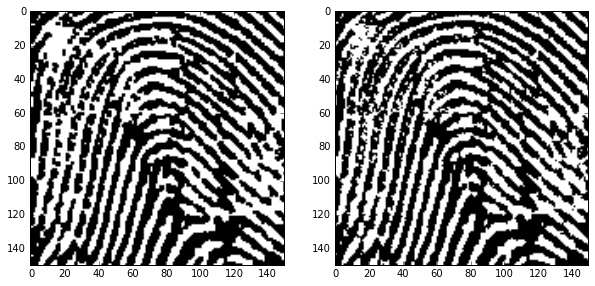

In [37]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
iench_fft_close = cv2.morphologyEx(iench_fft_bin_1, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(iench_fft_close ,cmap='Greys_r')

plt.subplot(122)
plt.imshow(iench_fft_bin_1,cmap='Greys_r')

# Fill Holes

# Thinning

In [23]:
iench_fft_close[0:10,0:10] / 255

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]], dtype=uint8)

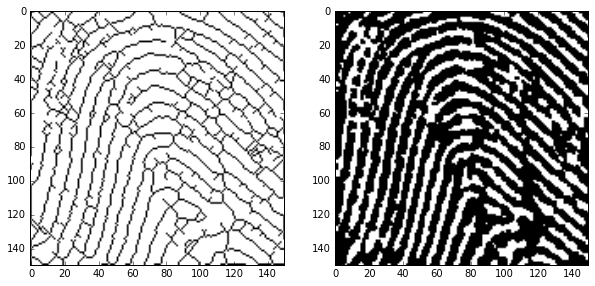

In [538]:
from skimage.morphology import medial_axis

img_thin = medial_axis(255 - iench_fft_close.copy())

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(255 - img_thin,cmap='Greys_r')
plt.subplot(122)
plt.imshow(iench_fft_close ,cmap='Greys_r')

In [38]:
# https://gist.github.com/joefutrelle/562f25bbcf20691217b8#file-bwmorph_thin-py-L14
import numpy as np
from scipy import ndimage as ndi

# lookup tables for bwmorph_thin

G123_LUT = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0], dtype=np.bool)

G123P_LUT = np.array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=np.bool)

def bwmorph_thin(image, n_iter=None):
    """
    Perform morphological thinning of a binary image

    Parameters
    ----------
    image : binary (M, N) ndarray
        The image to be thinned.

    n_iter : int, number of iterations, optional
        Regardless of the value of this parameter, the thinned image
        is returned immediately if an iteration produces no change.
        If this parameter is specified it thus sets an upper bound on
        the number of iterations performed.

    Returns
    -------
    out : ndarray of bools
        Thinned image.

    See also
    --------
    skeletonize

    Notes
    -----
    This algorithm [1]_ works by making multiple passes over the image,
    removing pixels matching a set of criteria designed to thin
    connected regions while preserving eight-connected components and
    2 x 2 squares [2]_. In each of the two sub-iterations the algorithm
    correlates the intermediate skeleton image with a neighborhood mask,
    then looks up each neighborhood in a lookup table indicating whether
    the central pixel should be deleted in that sub-iteration.

    References
    ----------
    .. [1] Z. Guo and R. W. Hall, "Parallel thinning with
           two-subiteration algorithms," Comm. ACM, vol. 32, no. 3,
           pp. 359-373, 1989.
    .. [2] Lam, L., Seong-Whan Lee, and Ching Y. Suen, "Thinning
           Methodologies-A Comprehensive Survey," IEEE Transactions on
           Pattern Analysis and Machine Intelligence, Vol 14, No. 9,
           September 1992, p. 879

    Examples
    --------
    >>> square = np.zeros((7, 7), dtype=np.uint8)
    >>> square[1:-1, 2:-2] = 1
    >>> square[0,1] =  1
    >>> square
    array([[0, 1, 0, 0, 0, 0, 0],
           [0, 0, 1, 1, 1, 0, 0],
           [0, 0, 1, 1, 1, 0, 0],
           [0, 0, 1, 1, 1, 0, 0],
           [0, 0, 1, 1, 1, 0, 0],
           [0, 0, 1, 1, 1, 0, 0],
           [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)
    >>> skel = bwmorph_thin(square)
    >>> skel.astype(np.uint8)
    array([[0, 1, 0, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)
    """
    # check parameters
    if n_iter is None:
        n = -1
    elif n_iter <= 0:
        raise ValueError('n_iter must be > 0')
    else:
        n = n_iter

    # check that we have a 2d binary image, and convert it
    # to uint8
    skel = np.array(image).astype(np.uint8)

    if skel.ndim != 2:
        raise ValueError('2D array required')
    if not np.all(np.in1d(image.flat,(0,1))):
        raise ValueError('Image contains values other than 0 and 1')

    # neighborhood mask
    mask = np.array([[ 8,  4,  2],
                     [16,  0,  1],
                     [32, 64,128]],dtype=np.uint8)

    # iterate either 1) indefinitely or 2) up to iteration limit
    while n != 0:
        before = np.sum(skel) # count points before thinning

        # for each subiteration
        for lut in [G123_LUT, G123P_LUT]:
            # correlate image with neighborhood mask
            N = ndi.correlate(skel, mask, mode='constant')
            # take deletion decision from this subiteration's LUT
            D = np.take(lut, N)
            # perform deletion
            skel[D] = 0

        after = np.sum(skel) # coint points after thinning

        if before == after:
            # iteration had no effect: finish
            break

        # count down to iteration limit (or endlessly negative)
        n -= 1

    return skel.astype(np.bool)


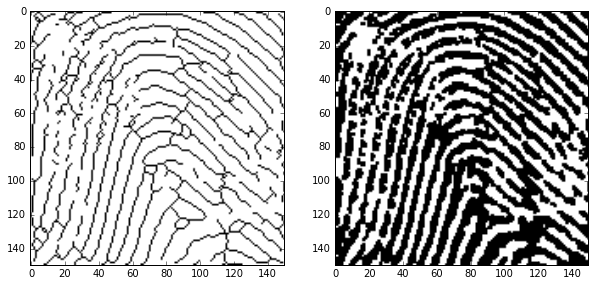

In [39]:
img_thin = bwmorph_thin(1 - iench_fft_close.copy() / 255,100)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(255 - img_thin,cmap='Greys_r')
plt.subplot(122)
plt.imshow(iench_fft_close ,cmap='Greys_r')

# Detect minuteas

In [40]:
counter = 0
clone = []
clone = 1 - img_thin * 1
clone = cv2.merge((clone, clone, clone))
clone[0:10,:10,1]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1]], dtype=int32)

40


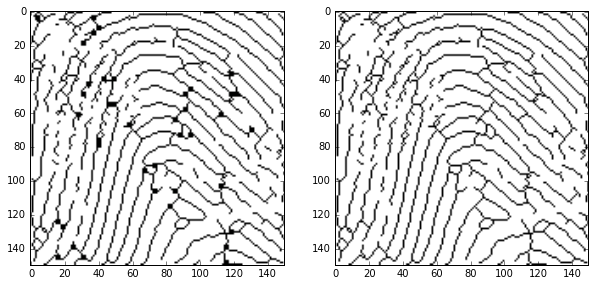

In [41]:
minuteas = []

clone = []
clone = 1 - img_thin * 1
clone = cv2.merge((clone, clone, clone))
bifurcations_counter = 0

# alterar o stepSize
for (x, y, window) in sliding_window(1 - img_thin * 1, stepSize=3, windowSize=(3, 3)):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != 3 or window.shape[1] != 3:
        continue
    
    if (window[1,1] == 0) and (np.sum(window) <= 5):                   
        minuteas.append(np.array([x,y]))
        cv2.rectangle(clone, (x, y), (x + 2, y + 2), (0,255,0), 1)
        bifurcations_counter += 1
        
    
        
print bifurcations_counter

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(clone) 

plt.subplot(122)
plt.imshow(255 - img_thin, cmap = 'Greys_r')

# Get Features from Minuteas

In [614]:
minuteas[10][0]

30

In [615]:
prev_coord_x = 0
prev_coord_y = 0

for i in np.arange(len(minuteas)):
    if (i != len(minuteas) - 1):                          
        next_coord_x = minuteas[i][0]
        next_coord_y = minuteas[i][1]
        if (prev_coord_x != 0) and (prev_coord_y != 0):            
            # generate feature                                    
            a = next_coord_x - prev_coord_x           
            b = next_coord_y - prev_coord_y
            d_next = np.sqrt(a**2 + b**2)
            ang = np.degrees(np.arctan2(b,a))
            print "%s, %s, %0.1f, %0.2f" % (prev_coord_x, prev_coord_y, d_next, ang)                   
        prev_coord_x = next_coord_x
        prev_coord_y = next_coord_y

3, 126, 96.0, -88.21
6, 30, 25.6, -69.44
15, 6, 72.0, 90.00
15, 78, 72.1, -87.61
18, 6, 36.0, 90.00
18, 42, 27.7, -77.47
24, 15, 12.0, 90.00
24, 27, 111.0, 90.00
24, 138, 114.0, -88.49
27, 24, 6.7, -63.43
30, 18, 123.0, 90.00
30, 141, 27.2, -83.66
33, 114, 111.0, -88.45
36, 3, 6.7, 63.43
39, 9, 24.0, 90.00
39, 33, 27.7, 40.60
60, 51, 18.0, 90.00
60, 69, 25.6, 69.44
69, 93, 87.1, -88.03
72, 6, 99.0, 90.00
72, 105, 12.7, 45.00
81, 114, 51.1, -86.63
84, 63, 42.0, 90.00
84, 105, 19.0, 71.57
90, 123, 78.1, -87.80
93, 45, 9.0, 90.00
93, 54, 18.0, 90.00
93, 72, 63.0, 90.00
93, 135, 105.0, -88.36
96, 30, 36.1, 85.24
99, 66, 51.0, 90.00
99, 117, 58.2, -78.11
111, 60, 9.0, 90.00
111, 69, 36.0, 90.00
111, 105, 54.1, -86.82
114, 51, 21.0, 90.00
114, 72, 66.0, 90.00
114, 138, 9.0, 90.00
114, 147, 123.0, -88.60
117, 24, 102.0, 88.32
120, 126, 72.2, -85.24
126, 54, 30.1, 84.29
129, 84, 6.7, -63.43
132, 78, 3.0, 90.00
132, 81, 15.0, 90.00
132, 96, 16.2, 68.20


# Gabor filtering

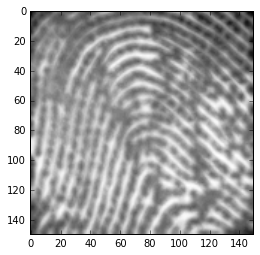

In [68]:
# TODO
#https://cvtuts.wordpress.com/2014/04/27/gabor-filters-a-practical-overview/

def build_filters():
    filters = []
    ksize = 12
    for theta in np.arange(0, np.pi, np.pi / 8):
        kern = cv2.getGaborKernel((ksize, ksize),3.0, theta, 7.1, 2.5, 0, ktype=cv2.CV_32F)
        kern /= 1.5 * kern.sum()
        filters.append(kern)
    return filters
 
def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum

filters = build_filters()
 
res1 = process(img21_cropped_gray, filters)
plt.imshow(res1,cmap='Greys_r')